In [1]:
#pip install yfinance
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [4]:
import yfinance as yf

symbol = 'EURUSD=X'
eurusd_df = yf.download(tickers=symbol) # no period brings all
eurusd_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0


In [5]:
eurusd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5188 entries, 2003-12-01 to 2023-11-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5188 non-null   float64
 1   High       5188 non-null   float64
 2   Low        5188 non-null   float64
 3   Close      5188 non-null   float64
 4   Adj Close  5188 non-null   float64
 5   Volume     5188 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 283.7 KB


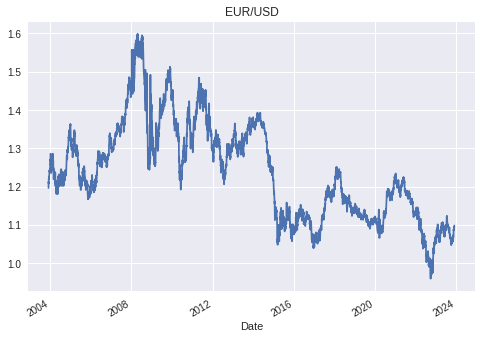

In [9]:
eurusd_df["Close"].plot(title="EUR/USD")
plt.show()

In [12]:
# creating a new column "Returns"
# https://www.geeksforgeeks.org/python-pandas-dataframe-shift/
# 
# every day, period=1, divide with inmediatly before
eurusd_df["Returns"] = np.log(eurusd_df["Close"].div(eurusd_df["Close"].shift(1)))
eurusd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5188 entries, 2003-12-01 to 2023-11-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5188 non-null   float64
 1   High       5188 non-null   float64
 2   Low        5188 non-null   float64
 3   Close      5188 non-null   float64
 4   Adj Close  5188 non-null   float64
 5   Volume     5188 non-null   int64  
 6   Returns    5187 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 324.2 KB


In [13]:
eurusd_df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0,NaN
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0,0.010307
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0,0.002809
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0,-0.003473
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0,0.008736


Simple Buy and Hold Strategy

In [14]:
eurusd_df.dropna(inplace=True)
eurusd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5187 entries, 2003-12-02 to 2023-11-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5187 non-null   float64
 1   High       5187 non-null   float64
 2   Low        5187 non-null   float64
 3   Close      5187 non-null   float64
 4   Adj Close  5187 non-null   float64
 5   Volume     5187 non-null   int64  
 6   Returns    5187 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 324.2 KB


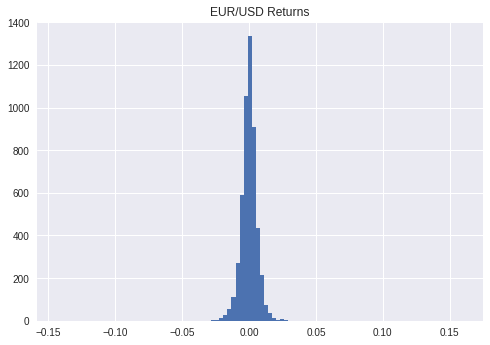

In [15]:
# by ploting distributions we see that most of the time EUR/DOL are very much a like values
eurusd_df.Returns.hist(bins=100)
plt.title("EUR/USD Returns")
plt.show()

In [16]:
# by seeng a negative value it means that Dollar is depreciated and EURO is gaining value in porcentage
eurusd_df.Returns.sum()

-0.08564043596723947

In [17]:
# the value us around 8 cents in change of buying a DOLLAR with EURO
np.exp(eurusd_df.Returns.sum())

0.9179242244256549

In [18]:
eurusd_df.Close[-1]/eurusd_df.Close[0]

0.9085117819631994

In [19]:
eurusd_df.Returns.cumsum().apply(np.exp)

Date
2003-12-02    1.010360
2003-12-03    1.013202
2003-12-04    1.009689
2003-12-05    1.018549
2003-12-08    1.021312
                ...   
2023-11-22    0.912512
2023-11-23    0.910227
2023-11-24    0.911517
2023-11-27    0.914369
2023-11-28    0.917924
Name: Returns, Length: 5187, dtype: float64

In [20]:
eurusd_df["Creturns"] = eurusd_df.Returns.cumsum().apply(np.exp)
eurusd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5187 entries, 2003-12-02 to 2023-11-28
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5187 non-null   float64
 1   High       5187 non-null   float64
 2   Low        5187 non-null   float64
 3   Close      5187 non-null   float64
 4   Adj Close  5187 non-null   float64
 5   Volume     5187 non-null   int64  
 6   Returns    5187 non-null   float64
 7   Creturns   5187 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 364.7 KB


In [22]:
eurusd_df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Creturns
Date,,,,,,,,
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0,0.010307,1.010360
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0,0.002809,1.013202
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0,-0.003473,1.009689
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0,0.008736,1.018549
2003-12-08,1.216797,1.224005,1.215407,1.222001,1.222001,0,0.002709,1.021312


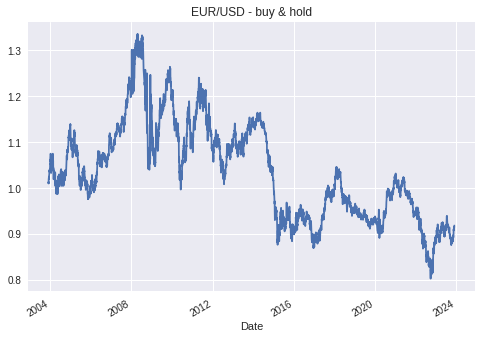

In [23]:
eurusd_df["Creturns"].plot(title="EUR/USD - buy & hold")
plt.show()